Enter filename:  test_pulse_1.5V.mca


2019-02-11 21:03:44,769 - DEBUG - file_path = /Users/nikourriola/Desktop/sp19/phys403/alpha/testPulseData/test_pulse_1.5V.mca
2019-02-11 21:03:44,771 - DEBUG - mean:  0.789062
std_dev:  9.678849
2019-02-11 21:03:44,772 - DEBUG - distribution center:  96.789062


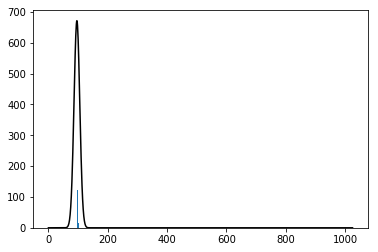

In [66]:
#!/usr/bin/env python3

def gaussian(x, mu, sigma, amp):
    import numpy as np

    coeff = amp/np.sqrt(2 * np.pi * (sigma**2))
    num = (x-mu)**2
    den = 2 * (sigma**2)

    return coeff * np.exp(-(num/den))

def open_data():
    
    import os
    import logging
    logging.basicConfig(level = logging.DEBUG, format = '%(asctime)s - %(levelname)s - %(message)s')
    
    #ask user for filename
    user_file = input('Enter filename:  ')

    #format user_file for file_path
    file_name = '/' + user_file

    #calibration data is located in testPulseData directory
    test_pulse_dir = os.path.abspath('testPulseData')

    #create full path to file
    file_path = test_pulse_dir + file_name

    logging.debug('file_path = %s' %file_path)

    file = open(file_path)
    raw_data = file.readlines()
    file.close()
    
    return raw_data

def fit_to_data():

    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import norm
    import logging
    logging.basicConfig(level = logging.DEBUG, format = '%(asctime)s - %(levelname)s - %(message)s')

    raw_data = open_data()
    
    count_data = raw_data[12:len(raw_data) - 1]

    #y data of histogram
    count_array = np.array(count_data, dtype = int)
    
    #choose threshold (arbitrary)
    threshold = 10
    
    signal = []
    
    #strip noise based on threshold
    for dataPoint in count_array:
        if dataPoint > threshold:
            signal.append(dataPoint)
        else:
            signal.append(0)
            
    signal = np.array(signal, dtype = int)
    
    #largest count recorded
    max_amplitude = np.amax(signal)
    
    #largest count channel
    mean_adjustment = np.argmax(signal)
    
    #calculate mean and standard deviation of the counts
    mean, std_dev = norm.fit(signal)
    logging.debug('mean:  %f\nstd_dev:  %f' %(mean, std_dev))
    
    #value to center the distribution on largest peak
    distribution_center = mean + mean_adjustment
    logging.debug('distribution center:  %f' %distribution_center)
    
    #x axis data
    bins_array = np.linspace(1, 1024, 1024)
    
    #calculating value of gaussian across domain
    gauss_y = gaussian(bins_array, distribution_center, std_dev, max_amplitude*1e2)
    
    
    plt.bar(bins_array, signal);
    plt.plot(bins_array, gauss_y, 'k-');
    plt.show()

    return (distribution_center, mean, std_dev)


fit_to_data()